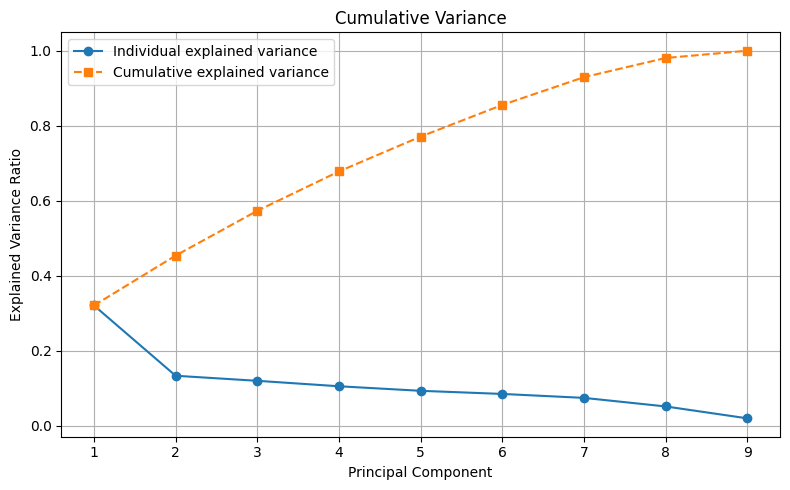

<Figure size 800x600 with 0 Axes>

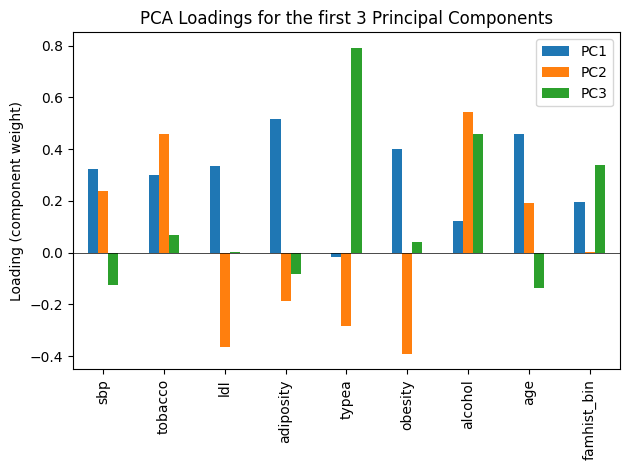

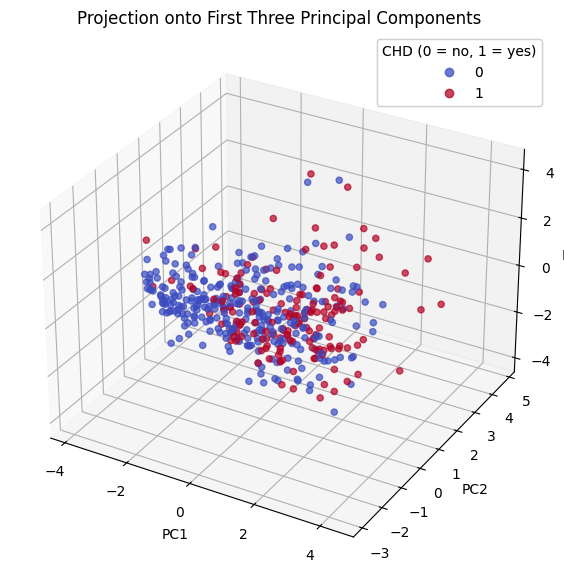

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("/content/SAHeart.csv")

df['famhist_bin'] = df['famhist'].map({'Present':1, 'Absent':0})

features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_bin']
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', label='Individual explained variance')
plt.plot(range(1, len(cum_var)+1), cum_var, 's--', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, index=features,
                          columns=[f'PC{i+1}' for i in range(len(features))])

plt.figure(figsize=(8, 6))
loading_df[['PC1', 'PC2','PC3']].plot(kind='bar')
plt.title('PCA Loadings for the first 3 Principal Components')
plt.ylabel('Loading (component weight)')
plt.axhline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]
pc3 = X_pca[:, 2]

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pc1, pc2, pc3,
                     c=df['chd'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection onto First Three Principal Components')

# Add color legend for CHD
legend = ax.legend(*scatter.legend_elements(),
                   title="CHD (0 = no, 1 = yes)")
ax.add_artist(legend)

plt.show()
